<a href="https://colab.research.google.com/github/aliemadabdo/ML-Basics/blob/main/Lab3-Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import the required modules, numpy for calculation, and Matplotlib for drawing
import numpy as np 
import matplotlib.pyplot as plt 
import csv

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
30
<class 'csv.DictReader'>
<class 'dict'>


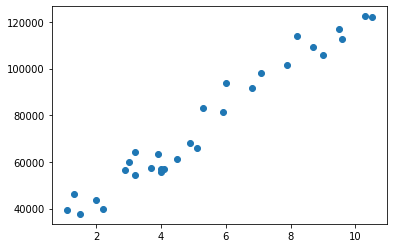

In [4]:
y, x=[], []
with open('Salary.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",") #list of dics
    for row in reader:
      x += [float(row['x'])]
      y += [int(float(row['y']))]

x=np.array(x)
y=np.array(y)
#Show the effect of a scatter plot
print(x)
print(y.size)
print(type(reader)) 
print(type(row)) 

plt.scatter(x,y)
 


1


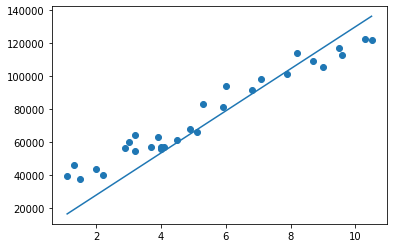

da list: [477385.54284709954, 475625.77741621545, 473872.488885161, 472125.65341561224, 470385.2472569831, 468651.24674610124, 466923.62830688717, 465202.3684500337, 463487.4437726862, 461778.8309581247, 460076.5067754467, 458380.4480792511, 456690.63180932426, 455007.03499032574, 453329.6347314761, 451658.40822624584, 449993.3327520452, 448334.3856699152, 446681.54442422005, 445034.7865423399, 443394.0896343661, 441759.4313927963, 440130.78959223116, 438508.14208907203, 436891.4668212207, 435280.7418077781, 433675.9451487466, 432077.05502473173, 430484.0496966457, 428896.9075054118, 427315.6068716692, 425740.1262954812, 424170.44435604144, 422606.5397113831, 421048.39109808876, 419495.97733100137, 417949.2773029364, 416408.26998439425, 414872.9344232748, 413343.24974459264, 411819.19515019265, 410300.74991846795, 408787.89340407774, 407280.60503766674, 405778.86432558525, 404282.65084961115, 402791.9442666713, 401306.7243085662, 399826.97078169324, 398352.66356677277, 396883.782618574

Text(0.5, 1.0, 'reversed learning curve')

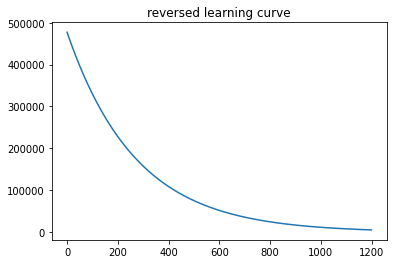

In [61]:
#The basic linear regression model is wx+ b, and since this is a two-dimensional space, the model is ax+ b
def model(a, b, x): 
  return a*x + b
#The most commonly used loss function of linear regression model is the loss function of mean variance difference 
def loss_function(a, b, x, y): 
  num = len(x) 
  #print(f"befor model fn {a}") 
  prediction=model(a,b,x) 
  #print(f"after model fn {a}") 
  return (0.5/num) * (np.square(prediction-y)).sum()
#The optimization function mainly USES partial derivatives to update two parameters a and b 
global daList
daList = []
def optimize(a,b,x,y): 
  num = len(x) 
  prediction = model(a,b,x) 
  #Update the values of A and B by finding the partial derivatives of the loss function on a and b 
  da = (1.0/num) * ((prediction -y)*x).sum() 
  daList.append(-da)
  db = (1.0/num) * ((prediction -y).sum())

  
  plt.show()
  #print(f"befor equation fn {a}") 
  a = a -Lr*da 
  #print(f"after equation fn {a}") 
  b = b -Lr*db 
 
  return a, b
#iterated function, return a and b 
def iterate(a,b,x,y,times): 
  for i in range(0,times):
    #print(f"befor optmize fn {a}") 
    a,b = optimize(a,b,x,y)
   # print(f"after optmize fn {a}") 
  #  print(a) 
  
  return a, b 

#Initialize parameters and display 
a = np.random.rand(1)
#print(a) 
b = np.random.rand(1) 
#print(b) 
Lr = 0.0001
#For the first iteration, the parameter values, losses, and visualization after the iteration are displayed 
for itr in range(1,2):
  print(itr)
  a,b = iterate(a,b,x,y,1200) 
  prediction=model(a,b,x) 
  loss = loss_function(a, b, x, y) 
  #print(a,b,loss)
  #print(f"y =\n {y}\n\n x =\n {x}\n\n prediction =\n {prediction}") 
  plt.scatter(x,y) 
  plt.plot(x,prediction)
  plt.show()
 # print(f"after each plot {a}") 
print(f"da list: {daList}")
# daList.reverse()
# daList=(-1)*daList
plt.plot(daList)
plt.title("Learning Curve")
